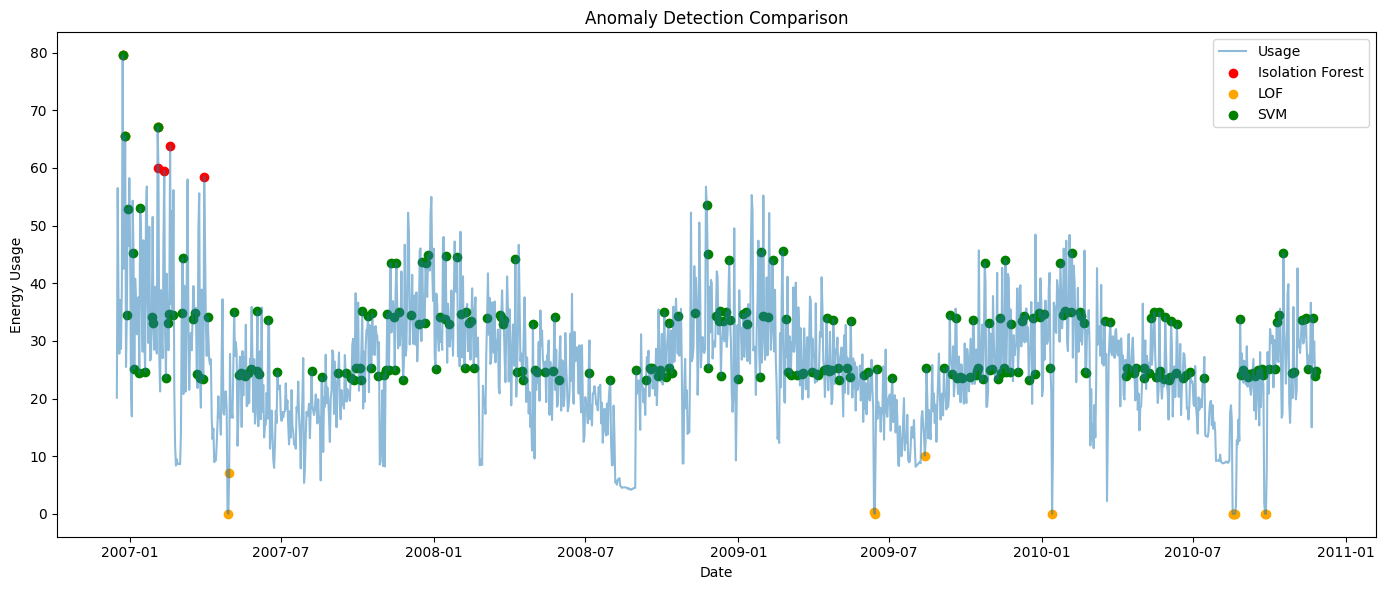

LOF:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1435
           1       0.20      0.43      0.27         7

    accuracy                           0.99      1442
   macro avg       0.60      0.71      0.63      1442
weighted avg       0.99      0.99      0.99      1442

SVM:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90      1435
           1       0.01      0.43      0.02         7

    accuracy                           0.82      1442
   macro avg       0.50      0.63      0.46      1442
weighted avg       0.99      0.82      0.90      1442



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

# Load the preprocessed dataset
data = pd.read_csv('../data/processed_with_anomalies.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Feature selection
X = data[['energy_usage']].values
y_true = data['anomaly'] if 'anomaly' in data.columns else None
iso_model = IsolationForest(contamination=0.01, random_state=42)
iso_pred = iso_model.fit_predict(X)
data['iso_anomaly'] = (iso_pred == -1).astype(int)
data.to_csv('../data/isolation_forest_anomalies.csv')
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_pred = lof_model.fit_predict(X)
data['lof_anomaly'] = (lof_pred == -1).astype(int)
data.to_csv('../data/lof_anomalies.csv')
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)
svm_model.fit(X)
svm_pred = svm_model.predict(X)
data['svm_anomaly'] = (svm_pred == -1).astype(int)
data.to_csv('../data/ocsvm_anomalies.csv')
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['energy_usage'], label='Usage', alpha=0.5)

plt.scatter(data.index[data['iso_anomaly'] == 1], data['energy_usage'][data['iso_anomaly'] == 1], color='red', label='Isolation Forest')
plt.scatter(data.index[data['lof_anomaly'] == 1], data['energy_usage'][data['lof_anomaly'] == 1], color='orange', label='LOF')
plt.scatter(data.index[data['svm_anomaly'] == 1], data['energy_usage'][data['svm_anomaly'] == 1], color='green', label='SVM')

plt.legend()
plt.title("Anomaly Detection Comparison")
plt.xlabel("Date")
plt.ylabel("Energy Usage")
plt.tight_layout()
plt.show()
if y_true is not None:
    print("LOF:\n", classification_report(y_true, data['lof_anomaly']))
    print("SVM:\n", classification_report(y_true, data['svm_anomaly']))
    print("Isolation Forest:\n", classification_report(y_true, data['iso_anomaly']))
else:
    print("No true labels available for classification report.")



In [6]:
!pip install plotly


^C


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 10.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.6 MB 8.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.6 MB 7.8 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.6 MB 7.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 6.5 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 6.1 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 5.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 5.4 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 4.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import plotly.graph_objects as go
import plotly.io as pio

# Use browser to render if not in Jupyter
pio.renderers.default = 'browser'

# Example scores (replace with your actual computed metrics)
models = ['Isolation Forest', 'LOF', 'OCSVM']
precision = [0.88, 0.80, 0.75]
recall = [0.82, 0.78, 0.70]
f1 = [0.85, 0.79, 0.72]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=precision,
    theta=models,
    fill='toself',
    name='Precision'
))

fig.add_trace(go.Scatterpolar(
    r=recall,
    theta=models,
    fill='toself',
    name='Recall'
))

fig.add_trace(go.Scatterpolar(
    r=f1,
    theta=models,
    fill='toself',
    name='F1 Score'
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Model Evaluation - Radar Chart",
    showlegend=True
)

fig.show()  # Or use fig.write_html("radar_chart.html") to save to file


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv("combined_anomaly_scores.csv")  # 🔁 Replace with your actual CSV file

# Step 2: Convert date column
df['date'] = pd.to_datetime(df['date']).dt.date

# Step 3: Count anomalies per model per date (assuming -1 means anomaly)
df['iso_anomaly'] = (df['iso_anomaly'] == -1).astype(int)
df['lof_anomaly'] = (df['lof_anomaly'] == -1).astype(int)
df['svm_anomaly'] = (df['svm_anomaly'] == -1).astype(int)

# Step 4: Create heatmap data
heatmap_data = df.groupby('date')[['iso_anomaly', 'lof_anomaly', 'svm_anomaly']].sum()

# Step 5: Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data.T, annot=True, cmap="Reds", fmt='g')
plt.title("Anomaly Count per Model per Day")
plt.xlabel("Date")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined